In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

In [2]:
def draw_comparission(x_num, y_num, param_names_list, values_to_compare_list,
                           train_results_all, test_results_all, 
                           save_path, size_x=15, size_y=10):
    fig = plt.figure(figsize=(size_x, size_y))
    fig.subplots_adjust(hspace=0.25, wspace=0.35)
    
    for param_name, values_to_compare, train_results, test_results, i in zip(
        param_names_list, values_to_compare_list, train_results_all, test_results_all, range(1, x_num*y_num+1)):
        
        ax = fig.add_subplot(x_num, y_num, i)
        line1, = ax.plot(values_to_compare, train_results, 'b', label='Train score')
        line2, = ax.plot(values_to_compare, test_results, 'r', label='Test score')
        ax.set_xlabel(f'{param_name}', fontsize=12)
        ax.set_ylabel('$R^2$', fontsize=12)
        ax.legend()
        ax.set_title(f'Porównanie {param_name}', fontsize=15)
    plt.savefig(save_path)
    plt.show()

In [3]:
data = pd.read_pickle('../data/training_set/training_set.pkl')
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Wzmocnienie gradientowe

In [4]:
params_dict = {
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth': np.linspace(1, 10, 10, endpoint=True),
    'min_samples_split': [0.1, 0.5, 1.0, 2, 5, 10],
    'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
}

param_names_list = [key for key, _ in params_dict.items()]
values_to_compare_list = [values for _, values in params_dict.items()]
train_results_all = []
test_results_all = []

In [5]:
for param, values in params_dict.items():
    train_results = []
    test_results = []
    for val in values:
        print(f'{param} = {val}')
        model = GradientBoostingRegressor(random_state=42, **{param: val})
        model.fit(X_train, y_train)
        train_results.append(model.score(X_train, y_train))
        test_results.append(model.score(X_test, y_test))
    train_results_all.append(train_results)
    test_results_all.append(test_results)
    print(f'Zakończone dla {param}.')

learning_rate = 1
learning_rate = 0.5
learning_rate = 0.25
learning_rate = 0.1
learning_rate = 0.05
learning_rate = 0.01
Zakończone dla learning_rate.
n_estimators = 1
n_estimators = 2
n_estimators = 4
n_estimators = 8
n_estimators = 16
n_estimators = 32
n_estimators = 64
n_estimators = 100
n_estimators = 200
Zakończone dla n_estimators.
max_depth = 1.0
max_depth = 2.0
max_depth = 3.0
max_depth = 4.0
max_depth = 5.0
max_depth = 6.0
max_depth = 7.0
max_depth = 8.0
max_depth = 9.0
max_depth = 10.0
Zakończone dla max_depth.
min_samples_split = 0.1
min_samples_split = 0.5
min_samples_split = 1.0
min_samples_split = 2
min_samples_split = 5
min_samples_split = 10
Zakończone dla min_samples_split.
min_samples_leaf = 0.1
min_samples_leaf = 0.2
min_samples_leaf = 0.30000000000000004
min_samples_leaf = 0.4
min_samples_leaf = 0.5
Zakończone dla min_samples_leaf.


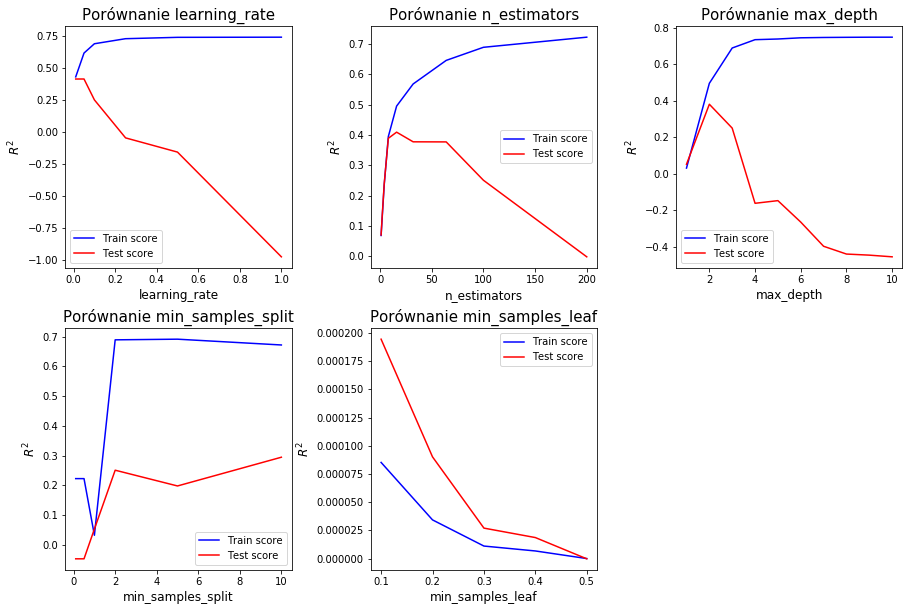

In [6]:
draw_comparission(2, 3, param_names_list, values_to_compare_list, 
                  train_results_all, test_results_all,
                 '../results/porównanie parametrów - GradientBoostingRegressor')